Se importan las librerías que vamos a utilizar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de set de datos

Se cargan los archivos del set de datos.

In [2]:
trata = pd.read_excel('set-de-datos/data_glotip.xlsx') #Lectura de Archivo

Información del dataframe.

In [3]:
trata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46558 entries, 0 to 46557
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UNODC              46532 non-null  object
 1   unodc_ddds@un.org  45600 non-null  object
 2   Unnamed: 2         45600 non-null  object
 3   Unnamed: 3         45600 non-null  object
 4   Unnamed: 4         46557 non-null  object
 5   Unnamed: 5         46557 non-null  object
 6   Unnamed: 6         46470 non-null  object
 7   Unnamed: 7         46557 non-null  object
 8   Unnamed: 8         46557 non-null  object
 9   Unnamed: 9         46557 non-null  object
 10  Unnamed: 10        46557 non-null  object
 11  Unnamed: 11        46557 non-null  object
 12  Unnamed: 12        46557 non-null  object
dtypes: object(13)
memory usage: 4.6+ MB


Se realiza vista previa del dataframe.

In [4]:
trata.head()

,UNODC,unodc_ddds@un.org,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,30/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,txtVALUE,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP


Elimino el primer y segundo registro que son irrelevantes.

In [5]:
trata = trata.drop(0)
trata = trata.drop(1)

trata.head()

,UNODC,unodc_ddds@un.org,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP
5,AFG,Afghanistan,Asia,Southern Asia,Offences of trafficking in persons,Total,Total,Total,Total,2013,Counts,103,GLOTIP
6,AFG,Afghanistan,Asia,Southern Asia,Persons brought into formal contact,Total,Total,Total,Total,2013,Counts,167,GLOTIP


Renombre de columnas.

In [6]:
trata.rename(columns={'UNODC': 'Code', 'unodc_ddds@un.org': 'Country', 'Unnamed: 2': 'Region', 'Unnamed: 3': 'Subregion', 'Unnamed: 4': 'Indicator', 'Unnamed: 5': 'Dimension', 'Unnamed: 6': 'Category', 'Unnamed: 7': 'Sex', 'Unnamed: 8': 'Age', 'Unnamed: 9': 'Year', 'Unnamed: 10': 'Unit', 'Unnamed: 11': 'Value',  'Unnamed: 12': 'Source'}, inplace=True)
trata.head()

,Code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit,Value,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP
5,AFG,Afghanistan,Asia,Southern Asia,Offences of trafficking in persons,Total,Total,Total,Total,2013,Counts,103,GLOTIP
6,AFG,Afghanistan,Asia,Southern Asia,Persons brought into formal contact,Total,Total,Total,Total,2013,Counts,167,GLOTIP


In [7]:
trata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46556 entries, 2 to 46557
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Code       46530 non-null  object
 1   Country    45599 non-null  object
 2   Region     45599 non-null  object
 3   Subregion  45599 non-null  object
 4   Indicator  46556 non-null  object
 5   Dimension  46556 non-null  object
 6   Category   46469 non-null  object
 7   Sex        46556 non-null  object
 8   Age        46556 non-null  object
 9   Year       46556 non-null  object
 10  Unit       46556 non-null  object
 11  Value      46556 non-null  object
 12  Source     46556 non-null  object
dtypes: object(13)
memory usage: 4.6+ MB


## Limpieza de datos

Se revisa valores de Indicador.

In [8]:
valores_unicos = trata['Indicator'].unique()
list(valores_unicos)

['Detected trafficking victims',
 'Offences of trafficking in persons',
 'Persons brought into formal contact',
 'Persons prosecuted',
 'Persons convicted']

Se revisa valores de Valor.

In [9]:
valores_unicos = trata['Value'].unique()
list(valores_unicos)

['<5',
 '103',
 '167',
 '15',
 '7',
 '34',
 '5',
 '12',
 '17',
 '10',
 '27',
 '23',
 '9',
 '24',
 '6',
 '21',
 '28',
 '8',
 '20',
 '40',
 '44',
 '62',
 '49',
 '57',
 '56',
 '25',
 '16',
 '92',
 '108',
 '14',
 '22',
 '72',
 '94',
 '83',
 '97',
 '37',
 '51',
 '39',
 '45',
 '84',
 '26',
 '66',
 '30',
 '43',
 '52',
 '95',
 '53',
 '42',
 '63',
 '125',
 '31',
 '48',
 '61',
 '109',
 '74',
 '36',
 '67',
 '60',
 '58',
 '91',
 '33',
 '54',
 '46',
 '65',
 '41',
 '35',
 '86',
 '112',
 '47',
 '159',
 '38',
 '59',
 '32',
 '11',
 '139',
 '13',
 '152',
 '29',
 '258',
 '169',
 '111',
 '75',
 '87',
 '70',
 '192',
 '64',
 '149',
 '19',
 '50',
 '131',
 '106',
 '77',
 '73',
 '18',
 '129',
 '186',
 '114',
 '338',
 '422',
 '168',
 '254',
 '178',
 '224',
 '263',
 '196',
 '118',
 '150',
 '76',
 '236',
 '289',
 '303',
 '79',
 '88',
 '215',
 '1,757',
 '540',
 '117',
 '204',
 '340',
 '374',
 '127',
 '213',
 '161',
 '2,004',
 '628',
 '238',
 '133',
 '319',
 '375',
 '81',
 '142',
 '209',
 '163',
 '182',
 '2,386',
 

Reemplazar los valores "<5" por "3" en la columna "Valor", haciendo un promedio.

In [10]:

trata['Value'] = trata['Value'].replace('<5', '3')


Reemplazar los valores "," por "" en la columna "Valor".

In [11]:

trata['Value'] = trata['Value'].str.replace(',', '')

Se revisa los valores únicos.

In [12]:
valores_unicos = trata['Value'].unique()
list(valores_unicos)

['3',
 '103',
 '167',
 '15',
 '7',
 '34',
 '5',
 '12',
 '17',
 '10',
 '27',
 '23',
 '9',
 '24',
 '6',
 '21',
 '28',
 '8',
 '20',
 '40',
 '44',
 '62',
 '49',
 '57',
 '56',
 '25',
 '16',
 '92',
 '108',
 '14',
 '22',
 '72',
 '94',
 '83',
 '97',
 '37',
 '51',
 '39',
 '45',
 '84',
 '26',
 '66',
 '30',
 '43',
 '52',
 '95',
 '53',
 '42',
 '63',
 '125',
 '31',
 '48',
 '61',
 '109',
 '74',
 '36',
 '67',
 '60',
 '58',
 '91',
 '33',
 '54',
 '46',
 '65',
 '41',
 '35',
 '86',
 '112',
 '47',
 '159',
 '38',
 '59',
 '32',
 '11',
 '139',
 '13',
 '152',
 '29',
 '258',
 '169',
 '111',
 '75',
 '87',
 '70',
 '192',
 '64',
 '149',
 '19',
 '50',
 '131',
 '106',
 '77',
 '73',
 '18',
 '129',
 '186',
 '114',
 '338',
 '422',
 '168',
 '254',
 '178',
 '224',
 '263',
 '196',
 '118',
 '150',
 '76',
 '236',
 '289',
 '303',
 '79',
 '88',
 '215',
 '1757',
 '540',
 '117',
 '204',
 '340',
 '374',
 '127',
 '213',
 '161',
 '2004',
 '628',
 '238',
 '133',
 '319',
 '375',
 '81',
 '142',
 '209',
 '163',
 '182',
 '2386',
 '512

Se cambia tipo de dato de Valor a float, para poder hacer cálculos.

In [13]:
trata['Value'] = trata['Value'].astype(int)

In [14]:
trata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46556 entries, 2 to 46557
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Code       46530 non-null  object
 1   Country    45599 non-null  object
 2   Region     45599 non-null  object
 3   Subregion  45599 non-null  object
 4   Indicator  46556 non-null  object
 5   Dimension  46556 non-null  object
 6   Category   46469 non-null  object
 7   Sex        46556 non-null  object
 8   Age        46556 non-null  object
 9   Year       46556 non-null  object
 10  Unit       46556 non-null  object
 11  Value      46556 non-null  int32 
 12  Source     46556 non-null  object
dtypes: int32(1), object(12)
memory usage: 4.4+ MB


Corregir el Código pais y País de Aruba/Curacao.

In [15]:
trata[trata['Code'] == 'Aruba/Curacao']

,Code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit,Value,Source
2670,Aruba/Curacao,NaN,NaN,NaN,Detected trafficking victims,by country of repatriation,Venezuela (Bolivarian Republic of),Total,Total,2011,Counts,3,GLOTIP


Agrega el Código.

In [16]:
for x in trata.index:
  if trata.loc[x, 'Code'] == 'Aruba/Curacao':
     trata.loc[x, 'Code'] = 'ABW'

In [17]:
trata[trata['Code'] == 'ABW']

,Code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit,Value,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,3,GLOTIP
2670,ABW,NaN,NaN,NaN,Detected trafficking victims,by country of repatriation,Venezuela (Bolivarian Republic of),Total,Total,2011,Counts,3,GLOTIP


Agrega el pais.

In [18]:
trata.loc[2670, 'Country'] = 'Aruba/Curacao'
trata[trata['Code'] == 'ABW']

,Code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit,Value,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,3,GLOTIP
2670,ABW,Aruba/Curacao,NaN,NaN,Detected trafficking victims,by country of repatriation,Venezuela (Bolivarian Republic of),Total,Total,2011,Counts,3,GLOTIP


Agrega region y subregion.

In [19]:
trata.loc[2670, 'Region'] = 'Americas'
trata[trata['Code'] == 'ABW']

,Code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit,Value,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,3,GLOTIP
2670,ABW,Aruba/Curacao,Americas,NaN,Detected trafficking victims,by country of repatriation,Venezuela (Bolivarian Republic of),Total,Total,2011,Counts,3,GLOTIP


In [20]:
trata.loc[2670, 'Subregion'] = 'Latin America and the Caribbean'
trata[trata['Code'] == 'ABW']

,Code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit,Value,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,3,GLOTIP
2670,ABW,Aruba/Curacao,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Venezuela (Bolivarian Republic of),Total,Total,2011,Counts,3,GLOTIP


Agrego el código ISO al País Sark.

In [21]:
for x in trata.index:
  if trata.loc[x, 'Country'] == 'Sark':
     trata.loc[x, 'Code'] = 'CRQ'

In [22]:
trata[trata['Country'] == 'Sark']

,Code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit,Value,Source
37753,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2017,Counts,3,GLOTIP
37754,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2018,Counts,3,GLOTIP
37755,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,18 years or over,2018,Counts,3,GLOTIP
37756,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Male,0 to 17 years,2018,Counts,3,GLOTIP
37757,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,by form of exploitation,Sexual exploitation,Male,18 years or over,2018,Counts,3,GLOTIP
37758,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2019,Counts,3,GLOTIP
37759,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Male,0 to 17 years,2019,Counts,3,GLOTIP
37760,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,by form of exploitation,Sexual exploitation,Male,18 years or over,2019,Counts,3,GLOTIP
37761,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2020,Counts,3,GLOTIP
37762,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,18 years or over,2020,Counts,3,GLOTIP


In [23]:
trata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46556 entries, 2 to 46557
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Code       46556 non-null  object
 1   Country    45600 non-null  object
 2   Region     45600 non-null  object
 3   Subregion  45600 non-null  object
 4   Indicator  46556 non-null  object
 5   Dimension  46556 non-null  object
 6   Category   46469 non-null  object
 7   Sex        46556 non-null  object
 8   Age        46556 non-null  object
 9   Year       46556 non-null  object
 10  Unit       46556 non-null  object
 11  Value      46556 non-null  int32 
 12  Source     46556 non-null  object
dtypes: int32(1), object(12)
memory usage: 4.4+ MB


Se eliminan códigos de pais inexistentes sin datos de descripción de País, región y subregión. 

In [24]:
conjunto_valores = ['CAR', 'CAS', 'MCA', 'MCN', 'EEU', 'SAF', 'SAM' ]
condicion = trata['Code'].isin(conjunto_valores)
trata = trata.drop(trata[condicion].index)

Verifica valores únicos para Código.

In [25]:
valores_unicos = trata['Code'].unique()
list(valores_unicos)

['ABW',
 'AFG',
 'AGO',
 'ALB',
 'AND',
 'ARE',
 'ARG',
 'ARM',
 'ATG',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BIH',
 'BLR',
 'BLZ',
 'BOL',
 'BRA',
 'BRB',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COK',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CUB',
 'CUW',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FJI',
 'FRA',
 'FSM',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GRD',
 'GTM',
 'GUY',
 'HKG',
 'HND',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KIR',
 'KNA',
 'KOR',
 'KWT',
 'LAO',
 'LBN',
 'LBR',
 'LBY',
 'LCA',
 'LIE',
 'LKA',
 'LSO',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 'MAR',
 'MCO',
 'MDA',
 'MDG',
 'MDV',
 'MEX',
 'MHL',
 'MKD',
 'MLI',
 'MLT',
 'MMR',
 'MNE',
 'MNG',
 'MOZ',
 'MRT',


In [26]:
trata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45600 entries, 2 to 46557
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Code       45600 non-null  object
 1   Country    45600 non-null  object
 2   Region     45600 non-null  object
 3   Subregion  45600 non-null  object
 4   Indicator  45600 non-null  object
 5   Dimension  45600 non-null  object
 6   Category   45513 non-null  object
 7   Sex        45600 non-null  object
 8   Age        45600 non-null  object
 9   Year       45600 non-null  object
 10  Unit       45600 non-null  object
 11  Value      45600 non-null  int32 
 12  Source     45600 non-null  object
dtypes: int32(1), object(12)
memory usage: 4.7+ MB


Se verifican valores únicos de País.

In [27]:
valores_unicos = trata['Country'].unique()
list(valores_unicos)

['Aruba',
 'Afghanistan',
 'Angola',
 'Albania',
 'Andorra',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Aruba/Curacao',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bolivia (Plurinational State of)',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Switzerland',
 'Chile',
 'China',
 'Côte d’Ivoire',
 'Cameroon',
 'Democratic Republic of the Congo',
 'Congo',
 'Cook Islands',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Egypt',
 'Spain',
 'Estonia',
 'Ethiopia',
 'Finland',
 'Fiji',
 'France',
 'Micronesia (Federated States of)',
 'Gabon',
 'United Kingdom of Great Britain and Northern Ireland

In [28]:
valores_unicos = trata['Region'].unique()
list(valores_unicos)

['Americas', 'Asia', 'Africa', 'Europe', 'Oceania']

In [29]:
valores_unicos = trata['Subregion'].unique()
list(valores_unicos)

['Latin America and the Caribbean',
 'Southern Asia',
 'Sub-Saharan Africa',
 'Southern Europe',
 'Western Asia',
 'Australia and New Zealand',
 'Western Europe',
 'Eastern Europe',
 'South-eastern Asia',
 'Northern America',
 'Eastern Asia',
 'Polynesia',
 'Northern Europe',
 'Northern Africa',
 'Melanesia',
 'Micronesia',
 'Central Asia']

In [30]:
trata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45600 entries, 2 to 46557
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Code       45600 non-null  object
 1   Country    45600 non-null  object
 2   Region     45600 non-null  object
 3   Subregion  45600 non-null  object
 4   Indicator  45600 non-null  object
 5   Dimension  45600 non-null  object
 6   Category   45513 non-null  object
 7   Sex        45600 non-null  object
 8   Age        45600 non-null  object
 9   Year       45600 non-null  object
 10  Unit       45600 non-null  object
 11  Value      45600 non-null  int32 
 12  Source     45600 non-null  object
dtypes: int32(1), object(12)
memory usage: 4.7+ MB


In [31]:
valores_unicos = trata['Dimension'].unique()
list(valores_unicos)

['by country of repatriation',
 'Total',
 'by form of exploitation',
 'by citizenship']

Dejamos solo los valores para formas de explotación para trabajar con los modelos.

In [32]:
trata_exp=trata

In [33]:
trata_exp = trata_exp[trata_exp['Dimension'] == 'by form of exploitation']

In [34]:
trata_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12826 entries, 7 to 46557
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Code       12826 non-null  object
 1   Country    12826 non-null  object
 2   Region     12826 non-null  object
 3   Subregion  12826 non-null  object
 4   Indicator  12826 non-null  object
 5   Dimension  12826 non-null  object
 6   Category   12826 non-null  object
 7   Sex        12826 non-null  object
 8   Age        12826 non-null  object
 9   Year       12826 non-null  object
 10  Unit       12826 non-null  object
 11  Value      12826 non-null  int32 
 12  Source     12826 non-null  object
dtypes: int32(1), object(12)
memory usage: 1.3+ MB


In [35]:
valores_unicos = trata_exp['Category'].unique()
list(valores_unicos)

['Forced labour', 'Sexual exploitation', 'Other forms of exploitation']

In [36]:
valores_unicos = trata_exp['Sex'].unique()
list(valores_unicos)

['Total', 'Female', 'Male', 'Other', 'Unknown']

In [37]:
trata_exp = trata_exp[trata_exp["Sex"] != 'Total']

In [38]:
trata_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5741 entries, 42 to 46556
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Code       5741 non-null   object
 1   Country    5741 non-null   object
 2   Region     5741 non-null   object
 3   Subregion  5741 non-null   object
 4   Indicator  5741 non-null   object
 5   Dimension  5741 non-null   object
 6   Category   5741 non-null   object
 7   Sex        5741 non-null   object
 8   Age        5741 non-null   object
 9   Year       5741 non-null   object
 10  Unit       5741 non-null   object
 11  Value      5741 non-null   int32 
 12  Source     5741 non-null   object
dtypes: int32(1), object(12)
memory usage: 605.5+ KB


In [39]:
valores_unicos = trata_exp['Age'].unique()
list(valores_unicos)

['0 to 17 years', '18 years or over', 'Unknown']

In [40]:
valores_unicos = trata_exp['Indicator'].unique()
list(valores_unicos)

['Detected trafficking victims']

In [41]:
valores_unicos = trata_exp['Year'].unique()
list(valores_unicos)

[2017, 2018, 2019, 2020, 2021, 2014, 2015, 2016]

## Análisis exploratorio de datos


In [42]:
trata_exp.head()

,Code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit,Value,Source
42,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,0 to 17 years,2017,Counts,3,GLOTIP
43,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,18 years or over,2017,Counts,3,GLOTIP
44,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Male,0 to 17 years,2017,Counts,12,GLOTIP
45,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Male,18 years or over,2017,Counts,5,GLOTIP
49,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Sexual exploitation,Female,0 to 17 years,2017,Counts,3,GLOTIP


Casos de trata - Analisis por región y subregión.

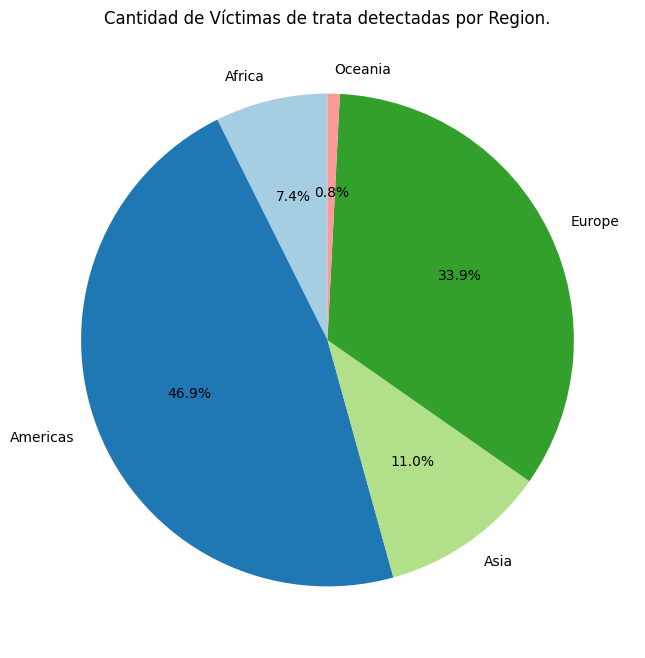

In [43]:

data_grouped = trata_exp.groupby('Region')['Value'].sum()

plt.figure(figsize=(8, 8))
plt.pie(data_grouped, labels=data_grouped.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Cantidad de Víctimas de trata detectadas por Region.')
plt.show()

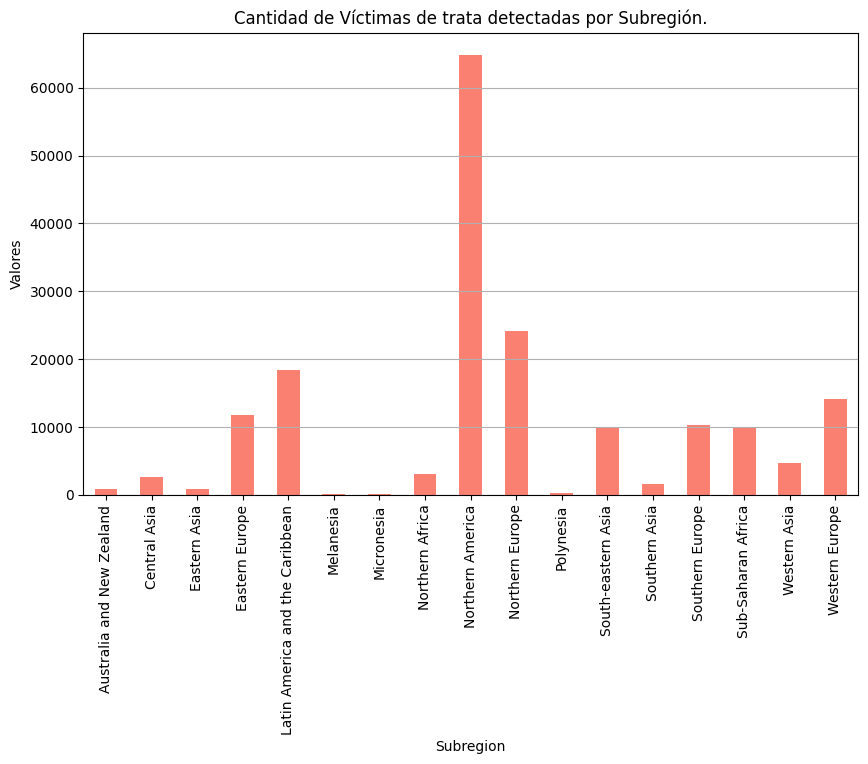

In [44]:
data_grouped = trata_exp.groupby('Subregion')['Value'].sum()

plt.figure(figsize=(10,6))
data_grouped.plot(kind='bar', color='salmon')
plt.title('Cantidad de Víctimas de trata detectadas por Subregión.')
plt.xlabel('Subregion')
plt.ylabel('Valores')
plt.grid(axis='y')
plt.show()

Víctimas por año.

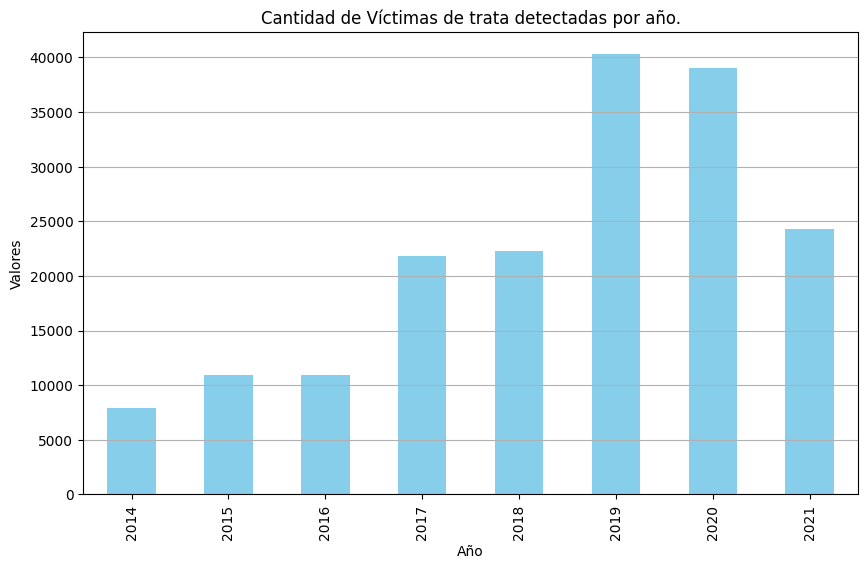

In [45]:
# Agrupar los datos por año y calcular la suma de los valores para cada año
data_grouped = trata_exp.groupby('Year')['Value'].sum()

# Crear un gráfico de barras
plt.figure(figsize=(10,6))
data_grouped.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Víctimas de trata detectadas por año.')
plt.xlabel('Año')
plt.ylabel('Valores')
plt.grid(axis='y')
plt.show()

Análisis en Argentina

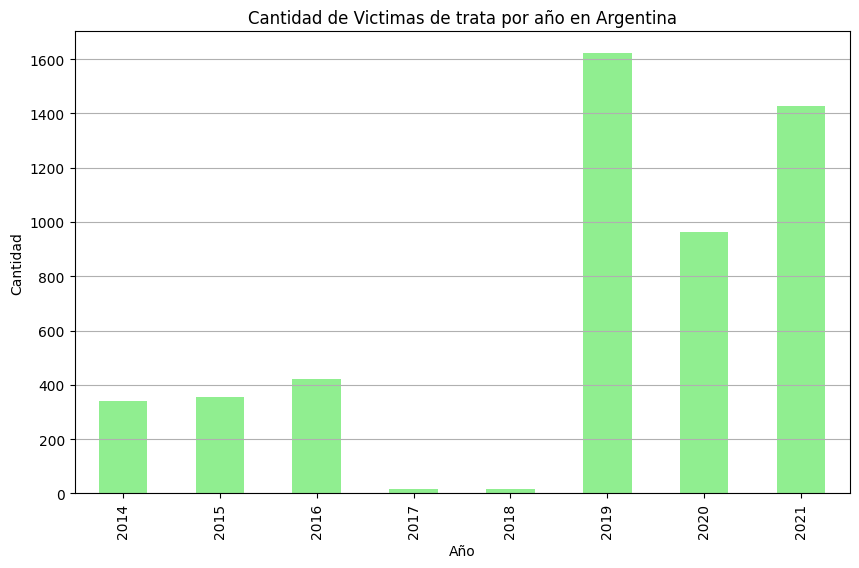

In [46]:

argentina_data = trata_exp[trata_exp['Country'] == 'Argentina']

argentina_grouped = argentina_data.groupby('Year')['Value'].sum()

plt.figure(figsize=(10,6))
argentina_grouped.plot(kind='bar', color='lightgreen')
plt.title('Cantidad de Victimas de trata por año en Argentina')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.grid(axis='y')
plt.show()

In [47]:

promedio_argentina = argentina_data['Value'].mean()
mediana_argentina = argentina_data['Value'].median()
desv_argentina = argentina_data['Value'].std()
var_argentina = argentina_data['Value'].var()

In [48]:
print(f"El promedio de los valores para Argentina es: {promedio_argentina}")
print(f"La mediana de los valores para Argentina es: {mediana_argentina}")
print(f"La desviación estándar de los valores para Argentina es: {desv_argentina}")
print(f"La varianza de los valores para Argentina es: {var_argentina}")

El promedio de los valores para Argentina es: 53.18556701030928
La mediana de los valores para Argentina es: 3.0
La desviación estándar de los valores para Argentina es: 127.11865601156099
La varianza de los valores para Argentina es: 16159.152706185569


Observar las categorías y su comportamiento por edad.

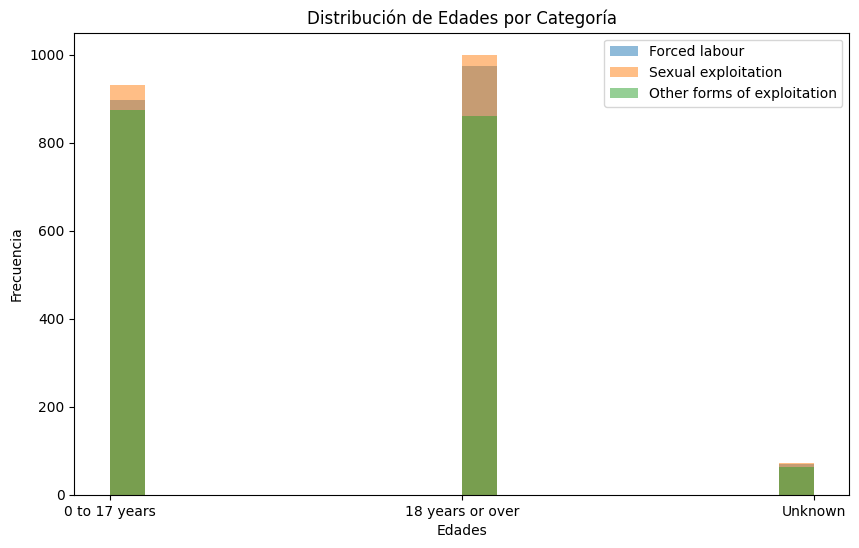

In [49]:
categorias_unicas = trata_exp['Category'].unique()

plt.figure(figsize=(10, 6))
for categoria in categorias_unicas:
    subset_data = trata_exp[trata_exp['Category'] == categoria]
    edades = subset_data['Age']
    plt.hist(edades, bins=20, alpha=0.5, label=categoria)

plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades por Categoría')
plt.legend()

plt.show()


Categorías de "Sexual exploitation" y "Forced labour".

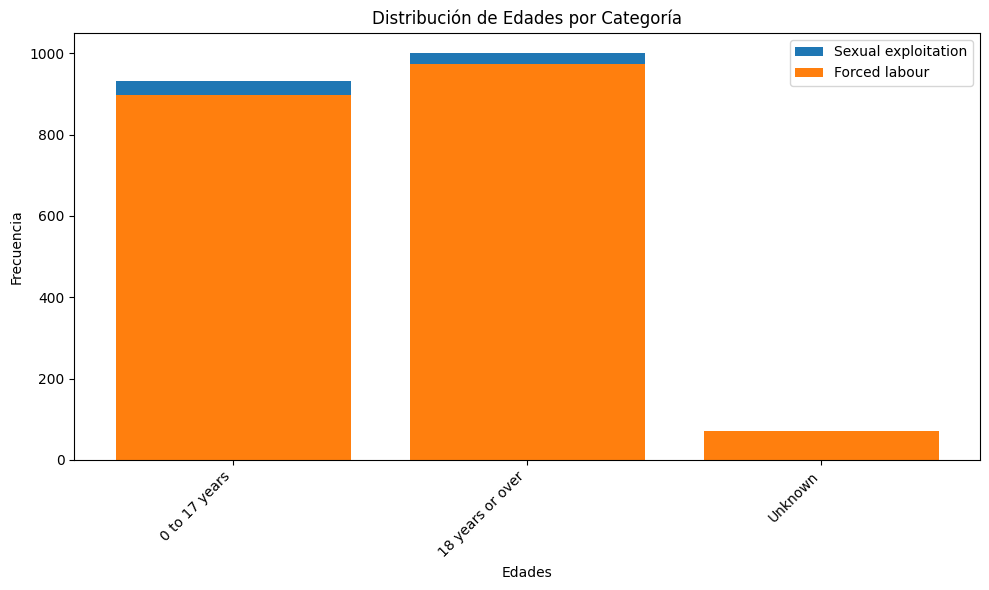

In [50]:
categorias_seleccionadas = ["Sexual exploitation", "Forced labour"]
data_filtrado = trata_exp[trata_exp['Category'].isin(categorias_seleccionadas)]

plt.figure(figsize=(10, 6))
frecuencias = trata_exp.groupby(['Age', 'Category']).size().unstack(fill_value=0)

edades_unicas = trata_exp['Age'].unique()

for categoria in categorias_seleccionadas:
    frecuencia_categoria = frecuencias[categoria]
    x = range(len(edades_unicas))
    plt.bar(x, frecuencia_categoria, label=categoria)

plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades por Categoría')
plt.xticks(x, edades_unicas, rotation=45, ha='right')

plt.legend()
plt.tight_layout()

plt.show()

Promedio de víctimas en America

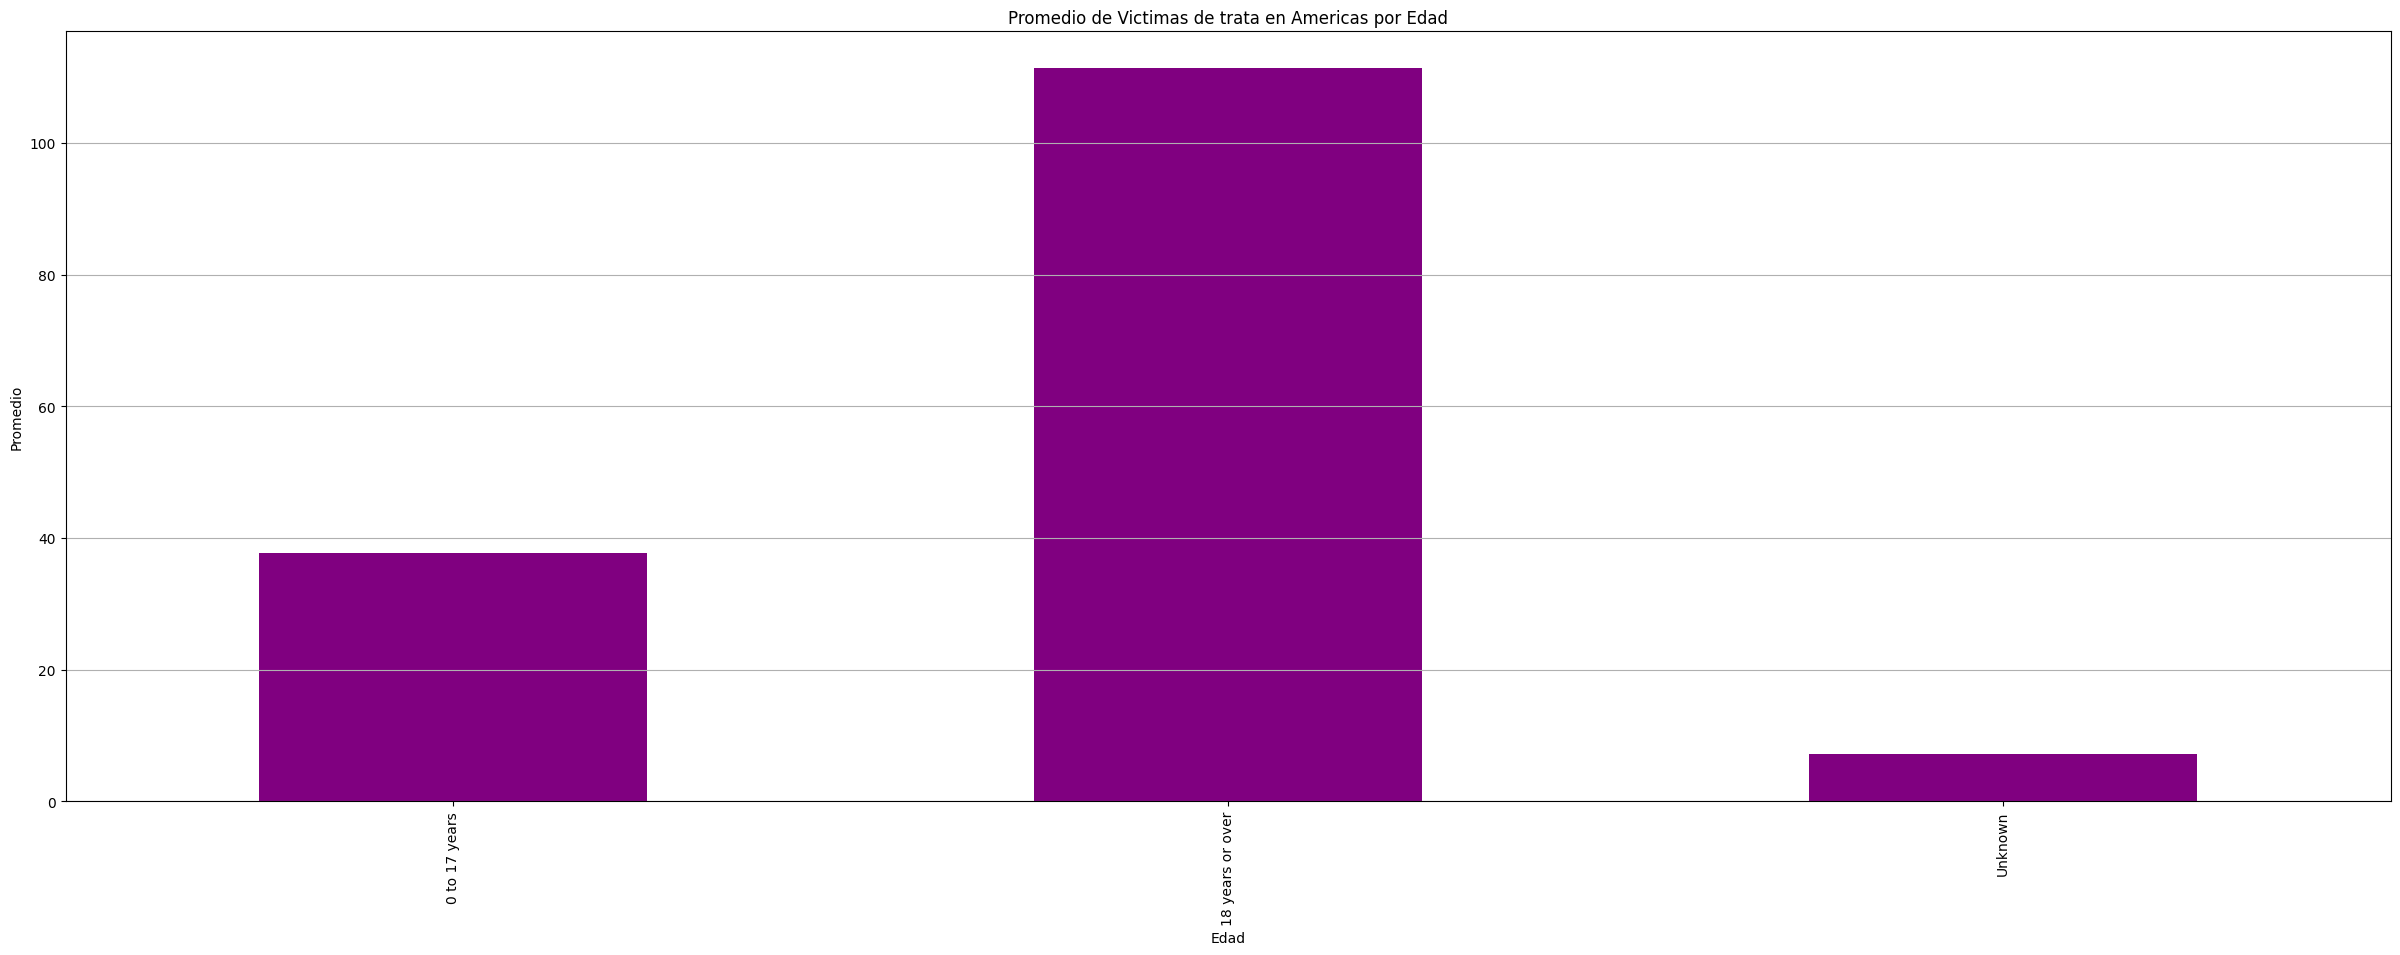

In [51]:
America_edad = trata_exp[trata_exp['Region'] == 'Americas']
America_group =America_edad.groupby('Age')['Value'].mean()
plt.figure(figsize=(30,10))
America_group.plot(kind='bar', color='purple')
plt.title('Promedio de Victimas de trata en Americas por Edad')
plt.xlabel('Edad')
plt.ylabel('Promedio')
plt.grid(axis='y')
plt.show()

Exportación del CSV para aplicar en los modelos.

In [52]:
nombre_archivo_csv = "trata_exp.csv"
trata_exp.to_csv(nombre_archivo_csv, index=False)